**Exercise**

# Hierarchical clustering of the grain data

In the video, you learned that the SciPy `linkage()`function performs hierarchical clustering on an array of samples. Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

**Instruction**

- Import:
  - `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
  - `matplotlib.pyplot` as `plt`.
- Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'`keyword argument. Assign the result to `mergings`.
- Plot a dendrogram using the `dendrogram()` function on `mergings`. Specify the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.

In [1]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)

sample_indices = [5 * i + 1 for i in range(42)]
df = df.iloc[sample_indices]
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))


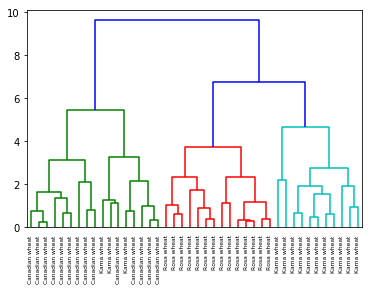

In [25]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


**Exercise**

# Hierarchies of stocks

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing`instead of `Normalizer`.

`linkage` and `dendrogram` have already been imported from `scipy.cluster.hierarchy`, and PyPlot has been imported as `plt`.

**Instruction**

- Import `normalize` from `sklearn.preprocessing`.
- Rescale the price movements for each stock by using the `normalize()` function on `movements`.
- Apply the `linkage()` function to `normalized_movements`, using `'complete'` linkage, to calculate the hierarchical clustering. Assign the result to `mergings`.
- Plot a dendrogram of the hierarchical clustering, using the list `companies` of company names as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=6` keyword arguments as you did in the previous exercise.

In [33]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
companies = list(df.index)
movements = df.values

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

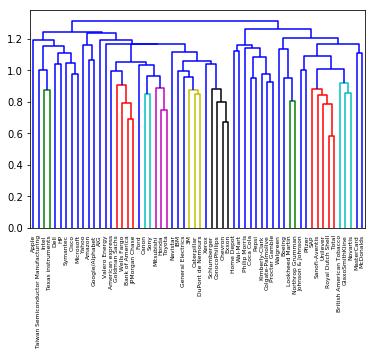

In [34]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, 
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()


**Exercise**

# Different linkage, different hierarchical clustering!

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using `'complete'`linkage. Now, perform a hierarchical clustering of the voting countries with `'single'` linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array `samples`. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list `country_names` gives the name of each voting country. This dataset was obtained from[Eurovision](http://www.eurovision.tv/page/results).

**Instruction**

- Import:
  - `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
  - `matplotlib.pyplot` as `plt`.
- Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='single'` keyword argument. Assign the result to `mergings`.
- Plot a dendrogram of the hierarchical clustering, using the list `country_names` as the `labels`. In addition, specify the `leaf_rotation=90`, and `leaf_font_size=6` keyword arguments as you have done earlier.



In [35]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/eurovision-2016.csv').fillna(0)

scores = pd.crosstab(index=df['From country'], columns=df['To country'], values=df['Televote Points'], aggfunc='first').fillna(12)
samples = scores.values
country_names = list(scores.index)


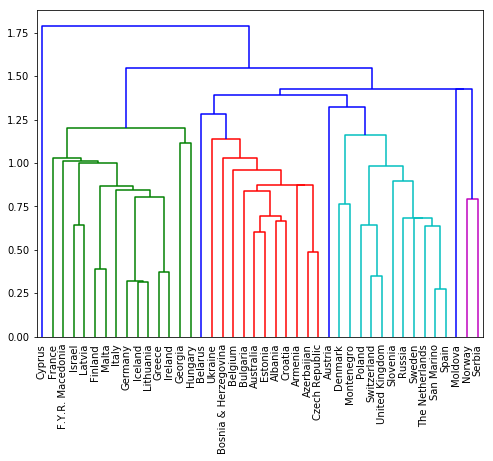

In [67]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')
fig = plt.figure(figsize=(8, 6))
# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           )
plt.show()


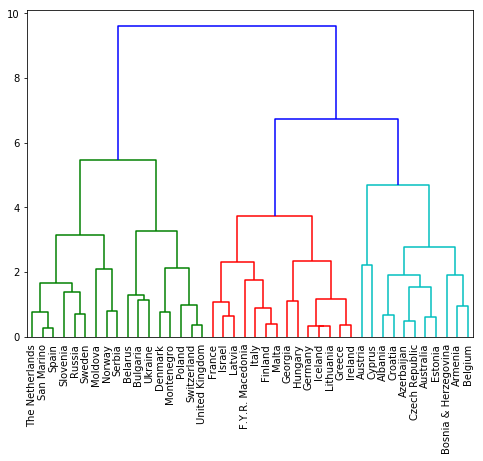

In [68]:
# Modified by Jinny: compare different methods

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')
fig = plt.figure(figsize=(8, 6))
# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           )

plt.show()

**Exercise**

# Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and `mergings` is the result of the `linkage()` function. The list `varieties` gives the variety of each grain sample.

**Instruction**

- Import:
  - `pandas` as `pd`.
  - `fcluster` from `scipy.cluster.hierarchy`.
- Perform a flat hierarchical clustering by using the `fcluster()` function on `mergings`. Specify a maximum height of `6` and the keyword argument `criterion='distance'`.
- Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values. This has been done for you.
- Create a cross-tabulation `ct` between `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label.

In [64]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)

sample_indices = [5 * i + 1 for i in range(42)]
df = df.iloc[sample_indices]
samples = df[list(range(7))].values
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))

from scipy.cluster.hierarchy import linkage

mergings = linkage(samples, method='complete')



In [65]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


**Exercise**

# t-SNE visualization of grain dataset

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array `samples` of grain samples and a list `variety_numbers`giving the variety number of each grain sample.

**Instruction**

- Import `TSNE` from `sklearn.manifold`.
- Create a TSNE instance called `model` with `learning_rate=200`.
- Apply the `.fit_transform()` method of `model` to `samples`. Assign the result to `tsne_features`.
- Select the column `0` of `tsne_features`. Assign the result to `xs`.
- Select the column `1` of `tsne_features`. Assign the result to `ys`.
- Make a scatter plot of the t-SNE features `xs` and `ys`. To color the points by the grain variety, specify the additional keyword argument `c=variety_numbers`.

In [70]:
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)

samples = df[list(range(7))].values
variety_numbers = list(df[7])

from matplotlib import pyplot as plt


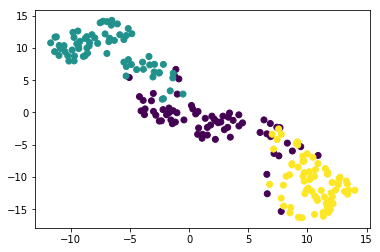

In [71]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


**Exercise**

# A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you). The list `companies` gives the name of each company. PyPlot (`plt`) has been imported for you.

**Instruction**

- Import `TSNE` from `sklearn.manifold`.
- Create a TSNE instance called `model` with `learning_rate=50`.
- Apply the `.fit_transform()` method of `model` to `normalized_movements`. Assign the result to `tsne_features`.
- Select column `0` and column `1` of `tsne_features`.
- Make a scatter plot of the t-SNE features `xs` and `ys`. Specify the additional keyword argument `alpha=0.5`.
- Code to label each point with its company name has been written for you using `plt.annotate()`, so just hit 'Submit Answer' to see the visualization!

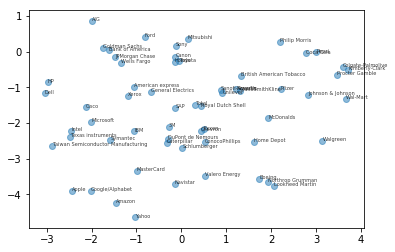

In [72]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
